In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'tourism_dataset.csv'  # Update this with the correct path to your file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
display(data.head())

# Step 1: Drop irrelevant columns
data_cleaned = data.drop(columns=['Location'])  # Drop 'Location' as it is not useful for training

# Step 2: Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Country', 'Category', 'Accommodation_Available']
for col in categorical_columns:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Step 3: Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Visitors', 'Rating', 'Revenue']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Display the cleaned dataset
print("Cleaned Dataset:")
display(data_cleaned.head())

# Save the cleaned dataset (optional)
cleaned_file_path = 'cleaned_tourism_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Original Dataset:


,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


Cleaned Dataset:


,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,5,4,1.545549,-1.461521,-1.447726,1
1,6,3,1.078865,-0.864575,1.057293,0
2,1,4,0.026425,-1.375007,-0.560486,1
3,1,3,0.422119,-1.660503,-0.712529,1
4,4,2,-1.298144,-1.366355,0.168855,0


Cleaned dataset saved to cleaned_tourism_dataset.csv


In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report
import numpy as np

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (weighted for multiclass problems)
precision = precision_score(y_test, y_pred, average='weighted')

# Scalability (runtime performance, measured indirectly)
import time
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
scalability = end_time - start_time

# Reliability (classification report for detailed metrics)
classification_report_output = classification_report(y_test, y_pred)

# Fairness (distribution of predictions across categories)
predictions_distribution = np.unique(y_pred, return_counts=True)

# Step 6: Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Scalability (training time): {scalability:.4f} seconds")
print("\nClassification Report:")
print(classification_report_output)
print("\nPredictions Distribution:")
for category, count in zip(predictions_distribution[0], predictions_distribution[1]):
    print(f"Category {category}: {count} predictions")


Accuracy: 0.51
Precision: 0.51
Scalability (training time): 1.5130 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       586
           1       0.52      0.51      0.52       612

    accuracy                           0.51      1198
   macro avg       0.51      0.51      0.51      1198
weighted avg       0.51      0.51      0.51      1198


Predictions Distribution:
Category 0: 593 predictions
Category 1: 605 predictions


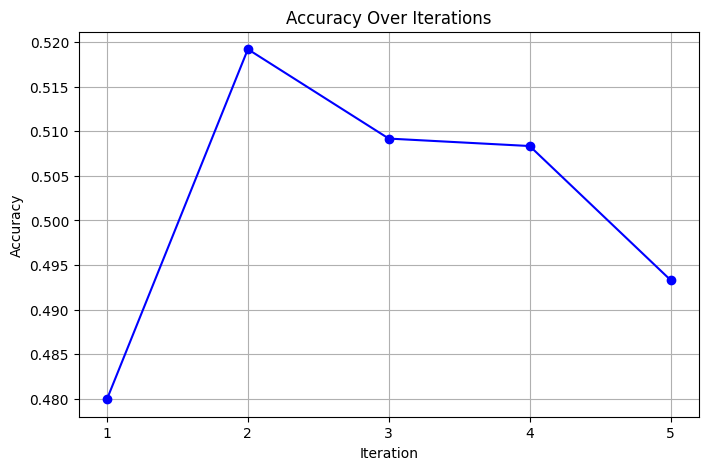

In [3]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Accuracy values for each iteration or experiment (replace these with your calculated values)
accuracy_values = []

# Run the SVM training and evaluation multiple times to collect accuracy values
for i in range(5):  # Example: 5 iterations
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    svm_model = SVC(kernel='linear', random_state=i)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy_values.append(accuracy_score(y_test, y_pred))

# Plot the accuracy values
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracy_values) + 1))
plt.grid(True)
plt.show()


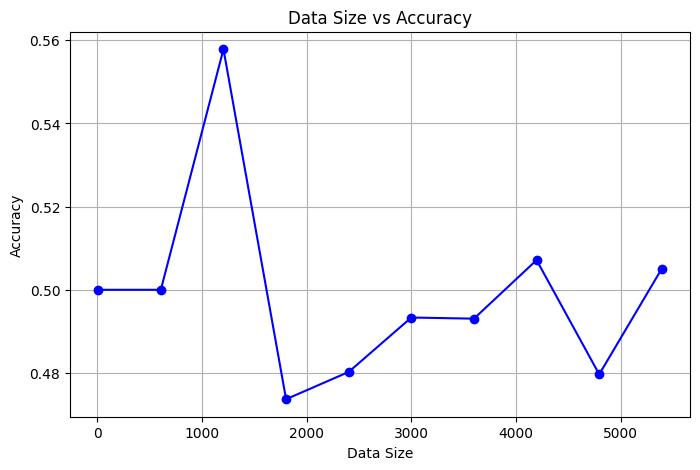

In [4]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables
data_sizes = []
accuracy_values = []

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Loop through increasing data sizes
for size in range(10, len(X), int(len(X) / 10)):  # Increment size by 10% of the dataset
    # Record data size
    data_sizes.append(size)
    
    # Subset the dataset
    X_subset = X[:size]
    y_subset = y[:size]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
    
    # Train the SVM model
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Record accuracy
    accuracy_values.append(accuracy)

# Step 3: Plot the data size vs accuracy chart
plt.figure(figsize=(8, 5))
plt.plot(data_sizes, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Data Size vs Accuracy')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


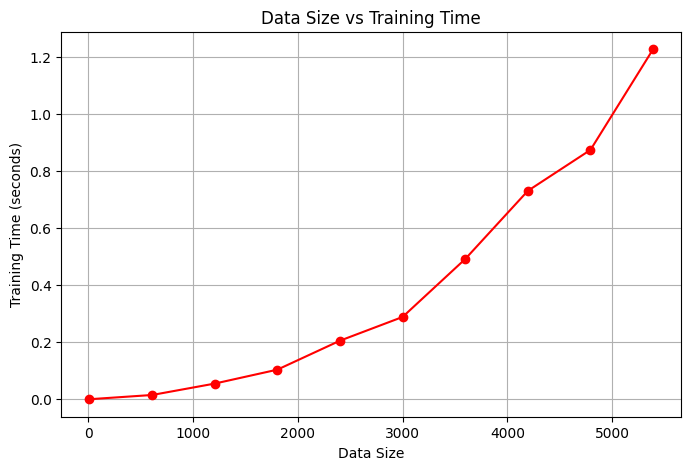

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Initialize variables
data_sizes = []
training_times = []

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Loop through increasing data sizes
for size in range(10, len(X), int(len(X) / 10)):  # Increment size by 10% of the dataset
    # Record data size
    data_sizes.append(size)
    
    # Subset the dataset
    X_subset = X[:size]
    y_subset = y[:size]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
    
    # Train the SVM model and measure time
    start_time = time.time()
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    end_time = time.time()
    
    # Record training time
    training_time = end_time - start_time
    training_times.append(training_time)

# Step 3: Plot the data size vs training time chart
plt.figure(figsize=(8, 5))
plt.plot(data_sizes, training_times, marker='o', linestyle='-', color='r')
plt.title('Data Size vs Training Time')
plt.xlabel('Data Size')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()


c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


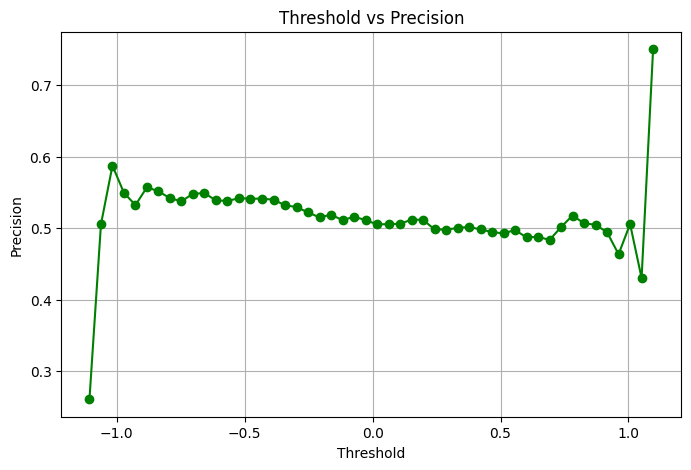

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Step 4: Compute decision scores and precision at different thresholds
decision_scores = svm_model.decision_function(X_test)
thresholds = np.linspace(min(decision_scores), max(decision_scores), 50)  # 50 threshold points
precision_values = []

for threshold in thresholds:
    y_pred_threshold = (decision_scores >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold, average='weighted')
    precision_values.append(precision)

# Step 5: Plot the threshold vs precision chart
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='g')
plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


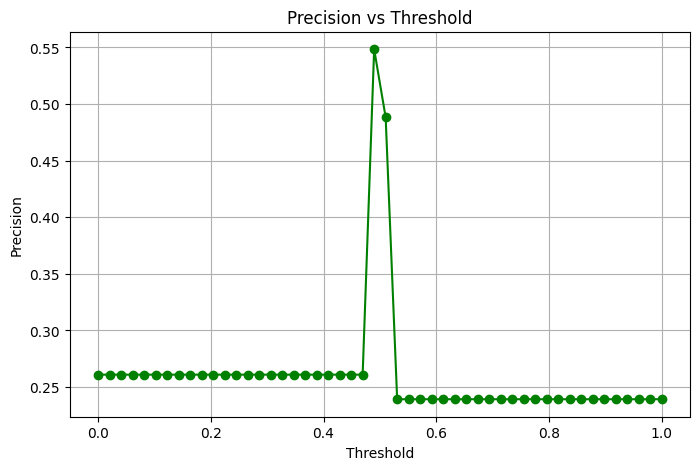

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM model with probability enabled
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Get predicted probabilities
y_probs = svm_model.predict_proba(X_test)

# Step 5: Calculate precision at different thresholds
thresholds = np.linspace(0, 1, 50)  # 50 thresholds between 0 and 1
precision_values = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_probs[:, 1] >= threshold).astype(int)
    # Calculate precision (use weighted for multiclass)
    precision = precision_score(y_test, y_pred_threshold, average='weighted', zero_division=0)
    precision_values.append(precision)

# Step 6: Plot the precision vs threshold chart
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='g')
plt.title('Precision vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


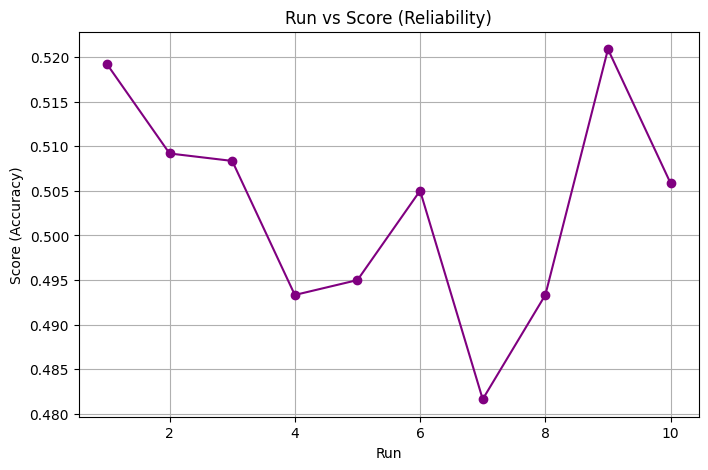

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables
runs = []
scores = []

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available'])  # Replace 'Category' with the actual target column
y = data_cleaned['Accommodation_Available']

# Step 2: Loop through multiple runs with different random states
for run in range(1, 11):  # Example: 10 runs
    runs.append(run)
    
    # Split into training and testing sets with a different random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run)
    
    # Train the SVM model
    svm_model = SVC(kernel='linear', random_state=run)
    svm_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)  # Using accuracy as the reliability score
    scores.append(score)

# Step 3: Plot the run vs score chart
plt.figure(figsize=(8, 5))
plt.plot(runs, scores, marker='o', linestyle='-', color='purple')
plt.title('Run vs Score (Reliability)')
plt.xlabel('Run')
plt.ylabel('Score (Accuracy)')
plt.grid(True)
plt.show()


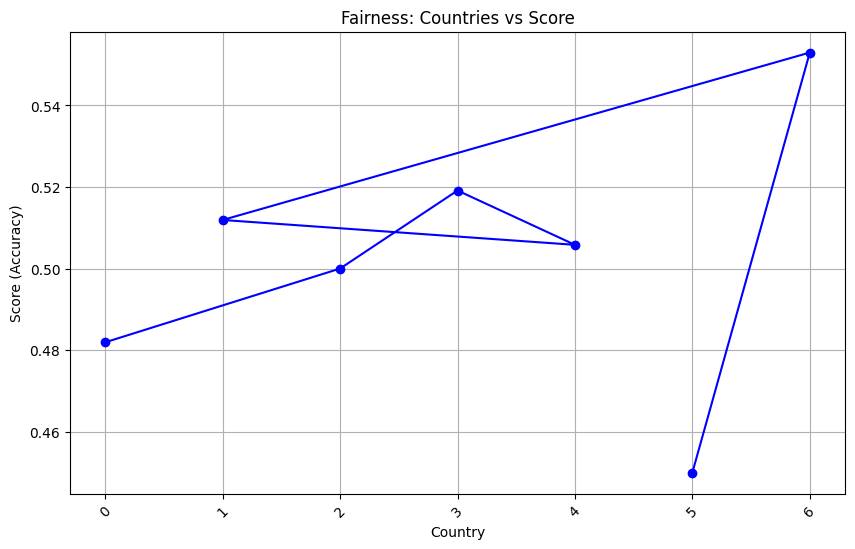

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables
countries = data_cleaned['Country'].unique()  # Replace 'Country' with your actual column name for countries
country_scores = []

# Step 1: Split the dataset into features and target variable
X = data_cleaned.drop(columns=['Accommodation_Available', 'Country'])  # Exclude target and grouping column
y = data_cleaned['Accommodation_Available']

# Step 2: Evaluate performance for each country
for country in countries:
    # Subset data for the specific country
    country_data = data_cleaned[data_cleaned['Country'] == country]
    X_country = country_data.drop(columns=['Accommodation_Available', 'Country'])
    y_country = country_data['Accommodation_Available']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_country, y_country, test_size=0.2, random_state=42)
    
    # Train the SVM model
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)  # Using accuracy as the fairness metric
    country_scores.append(score)

# Step 3: Plot the countries vs score chart
plt.figure(figsize=(10, 6))
plt.plot(countries, country_scores, marker='o', linestyle='-', color='blue')
plt.title('Fairness: Countries vs Score')
plt.xlabel('Country')
plt.ylabel('Score (Accuracy)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
